In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def init_plot():
    fig, ax = plt.subplots(3, 1, sharex=True)
    fig.set_size_inches(24, 24)
        
    for a in ax:
        a.grid()
        a.set_xlabel('Time [s]')
        a.set_xlim([0, 130])
        
    ax[0].set_ylabel('Total joint torque [Nm]')
    ax[1].set_ylabel('Total joint velocity [deg/s]')
    ax[2].set_ylabel('Total joint excitation [deg]')

    return fig, ax
    

def plot_report(filename):
    report = pd.read_csv(filename, delim_whitespace=True)
    
    torque = report.iloc[:,15:].T.abs().sum()
    velocity = report.iloc[:,8:15].T.abs().sum() / np.pi * 180
    excitation = report.iloc[:,1:8].T.abs().sum() / np.pi * 180
    time = report.TimeStamp
    
    ax[0].plot(time, torque, label=filename)
    ax[0].legend()
    #ax[0].set_ylim(ymax=10)
    ax[1].plot(time, velocity)
    ax[2].plot(time, excitation)

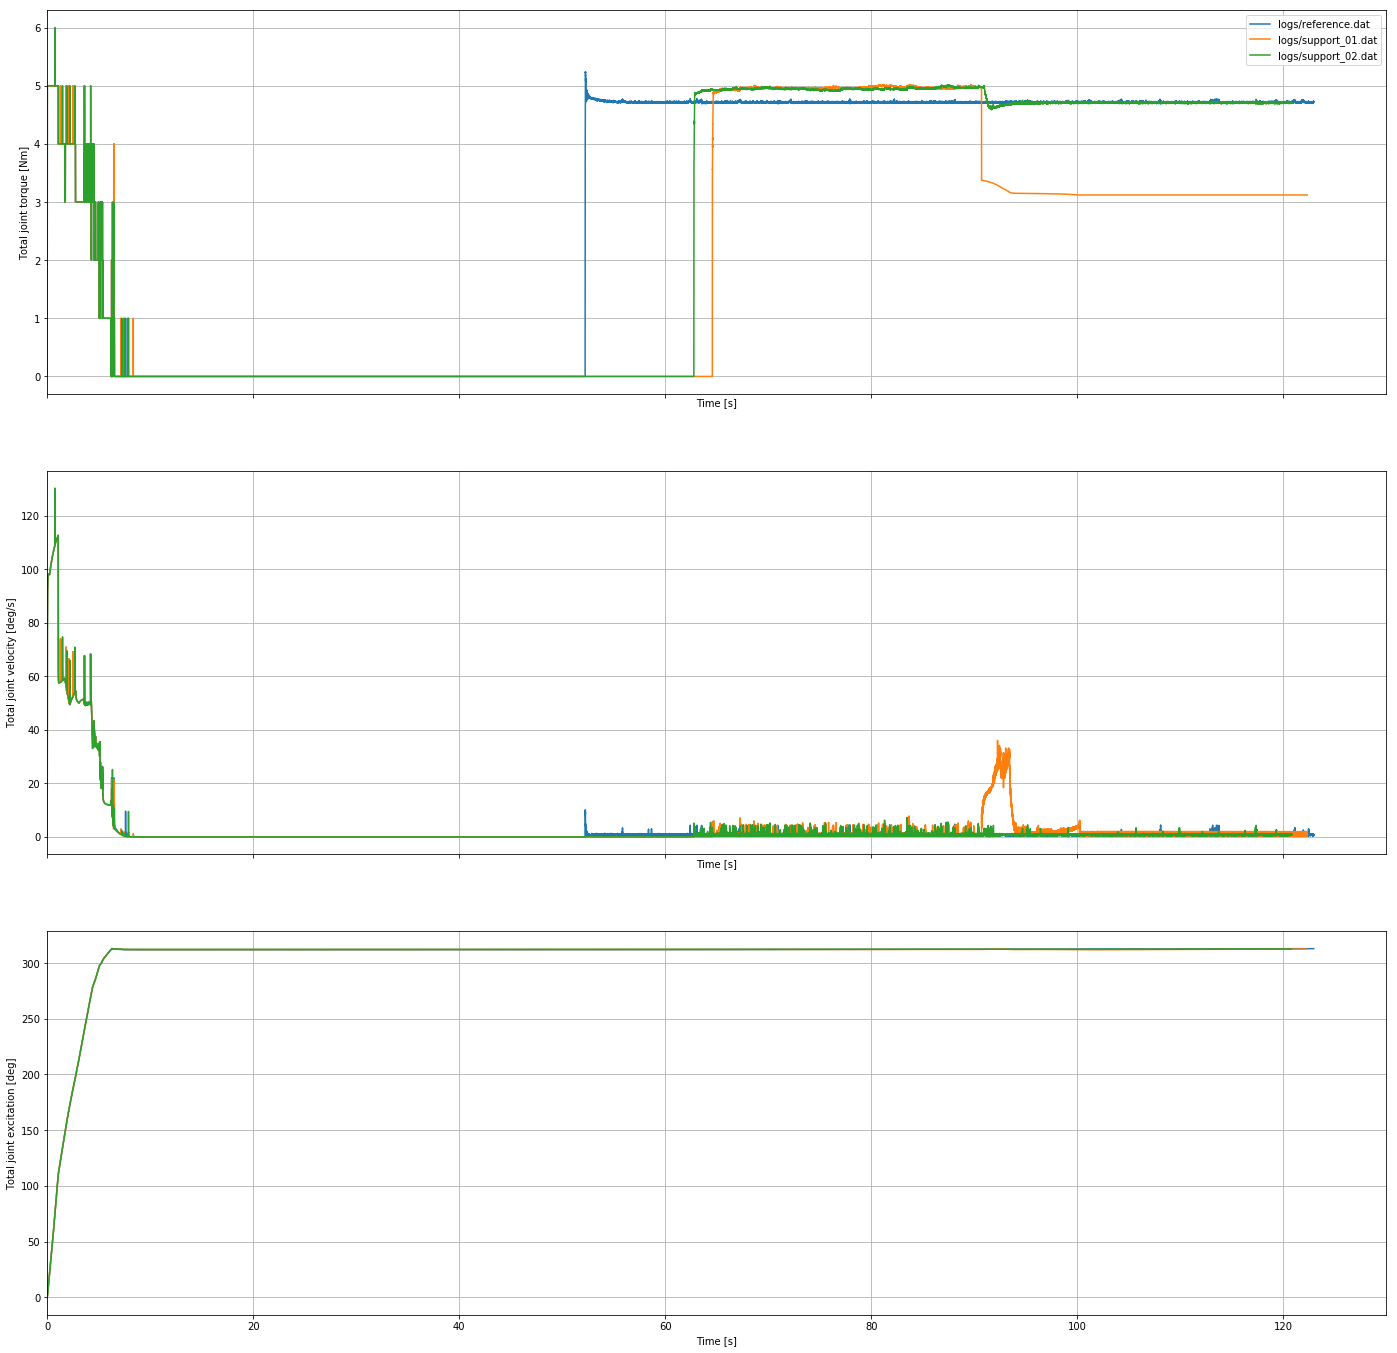

In [47]:
fig, ax = init_plot()
plot_report('logs/reference.dat') # Reference without any support; lower chain PID controlled
plot_report('logs/support_01.dat') # PID control disabled around 1:30; manipulator slides away
plot_report('logs/support_02.dat') # Support plate removed around 1:30; manipulator stays in place